Baseline

In [ ]:
import pandas as pd
import optuna
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

target_col = "smoking"

X = train_df.drop(columns=[target_col])
y = train_df[target_col]

test_ids = test_df["id"]

X = X.drop(columns=["id"])
X_test = test_df.drop(columns=["id"])

def objective(trial):
    params = {
        "iterations": trial.suggest_int("iterations", 100, 2000),
        "depth": trial.suggest_int("depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.3, log=True),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1.0, 10.0),
        "random_strength": trial.suggest_float("random_strength", 1e-3, 10.0, log=True),
        "border_count": trial.suggest_int("border_count", 32, 255),
        "verbose": 0,
        "eval_metric": "Accuracy",
        "task_type": "CPU",
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = []
    for train_idx, valid_idx in cv.split(X, y):
        X_train_fold, X_valid_fold = X.iloc[train_idx], X.iloc[valid_idx]
        y_train_fold, y_valid_fold = y.iloc[train_idx], y.iloc[valid_idx]

        train_pool = Pool(X_train_fold, y_train_fold)
        valid_pool = Pool(X_valid_fold, y_valid_fold)

        model = CatBoostClassifier(**params)
        model.fit(train_pool, eval_set=valid_pool, early_stopping_rounds=50, use_best_model=True)
        
        preds = model.predict(X_valid_fold)
        acc = np.mean(preds == y_valid_fold)
        scores.append(acc)

    return np.mean(scores)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30, show_progress_bar=True)

print("Best trial:")
best_trial = study.best_trial
print(f"  Value: {best_trial.value}")
print("  Params: ")
for key, value in best_trial.params.items():
    print(f"    {key}: {value}")

best_params = best_trial.params
best_params["eval_metric"] = "Accuracy"
best_params["verbose"] = 0
best_params["task_type"] = "CPU"

final_model = CatBoostClassifier(**best_params)
train_pool = Pool(X, y)
final_model.fit(train_pool)

test_preds = final_model.predict(X_test)

test_preds = test_preds.astype(int)

submission = pd.DataFrame({
    "id": test_ids,
    "smoking": test_preds
})
submission.to_csv("data/submissions.csv", index=False)

print("Submission file created: data/submissions.csv")


C:\Users\darbi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2024-12-08 18:11:40,102] A new study created in memory with name: no-name-3c47ba44-bd17-4eda-9a45-2dfb43b34379
Best trial: 0. Best value: 0.781584:   3%|▎         | 1/30 [00:45<21:45, 45.01s/it]

[I 2024-12-08 18:12:25,112] Trial 0 finished with value: 0.781584381506895 and parameters: {'iterations': 364, 'depth': 6, 'learning_rate': 0.056622988576544096, 'l2_leaf_reg': 2.3484100248468334, 'random_strength': 0.229860459677306, 'border_count': 103}. Best is trial 0 with value: 0.781584381506895.


Best trial: 0. Best value: 0.781584:   7%|▋         | 2/30 [02:44<41:27, 88.83s/it]

[I 2024-12-08 18:14:24,614] Trial 1 finished with value: 0.7684420397085255 and parameters: {'iterations': 1912, 'depth': 4, 'learning_rate': 0.0041778541528620155, 'l2_leaf_reg': 7.989587068041306, 'random_strength': 0.21680069782133074, 'border_count': 122}. Best is trial 0 with value: 0.781584381506895.


Best trial: 0. Best value: 0.781584:  10%|█         | 3/30 [02:53<23:31, 52.28s/it]

[I 2024-12-08 18:14:33,411] Trial 2 finished with value: 0.7536545009649567 and parameters: {'iterations': 1340, 'depth': 6, 'learning_rate': 0.0011789120619112624, 'l2_leaf_reg': 4.709740686555763, 'random_strength': 0.5713947748074663, 'border_count': 119}. Best is trial 0 with value: 0.781584381506895.


Best trial: 0. Best value: 0.781584:  13%|█▎        | 4/30 [04:00<25:12, 58.16s/it]

[I 2024-12-08 18:15:40,573] Trial 3 finished with value: 0.7700369325710136 and parameters: {'iterations': 664, 'depth': 4, 'learning_rate': 0.015668119925476526, 'l2_leaf_reg': 6.4174084241048845, 'random_strength': 7.074267468219182, 'border_count': 136}. Best is trial 0 with value: 0.781584381506895.


Best trial: 0. Best value: 0.781584:  17%|█▋        | 5/30 [05:42<30:47, 73.90s/it]

[I 2024-12-08 18:17:22,373] Trial 4 finished with value: 0.7740932858235626 and parameters: {'iterations': 1336, 'depth': 4, 'learning_rate': 0.0078115917843521706, 'l2_leaf_reg': 2.2066350942905624, 'random_strength': 0.04477217909221989, 'border_count': 207}. Best is trial 0 with value: 0.781584381506895.


Best trial: 0. Best value: 0.781584:  20%|██        | 6/30 [07:14<32:05, 80.25s/it]

[I 2024-12-08 18:18:54,952] Trial 5 finished with value: 0.7615788348732113 and parameters: {'iterations': 1511, 'depth': 3, 'learning_rate': 0.005303762215780383, 'l2_leaf_reg': 1.2765066482139542, 'random_strength': 3.599709641515957, 'border_count': 72}. Best is trial 0 with value: 0.781584381506895.


Best trial: 0. Best value: 0.781584:  23%|██▎       | 7/30 [08:37<31:01, 80.92s/it]

[I 2024-12-08 18:20:17,262] Trial 6 finished with value: 0.7813834366349945 and parameters: {'iterations': 1581, 'depth': 9, 'learning_rate': 0.02657520255264467, 'l2_leaf_reg': 7.440852104614109, 'random_strength': 0.035959232136708895, 'border_count': 87}. Best is trial 0 with value: 0.781584381506895.


Best trial: 0. Best value: 0.781584:  27%|██▋       | 8/30 [13:41<55:46, 152.09s/it]

[I 2024-12-08 18:25:21,738] Trial 7 finished with value: 0.7791605993029684 and parameters: {'iterations': 960, 'depth': 10, 'learning_rate': 0.008401799867214935, 'l2_leaf_reg': 6.53826720735651, 'random_strength': 1.4072600483870272, 'border_count': 196}. Best is trial 0 with value: 0.781584381506895.


Best trial: 0. Best value: 0.781584:  30%|███       | 9/30 [15:12<46:33, 133.05s/it]

[I 2024-12-08 18:26:52,904] Trial 8 finished with value: 0.7783694175212172 and parameters: {'iterations': 1589, 'depth': 3, 'learning_rate': 0.02274820260392315, 'l2_leaf_reg': 9.823942988295293, 'random_strength': 0.009947460151268522, 'border_count': 148}. Best is trial 0 with value: 0.781584381506895.


Best trial: 0. Best value: 0.781584:  33%|███▎      | 10/30 [16:11<36:43, 110.18s/it]

[I 2024-12-08 18:27:51,875] Trial 9 finished with value: 0.7802155191221772 and parameters: {'iterations': 718, 'depth': 3, 'learning_rate': 0.05363492322694941, 'l2_leaf_reg': 6.55244651047303, 'random_strength': 0.21625790962234143, 'border_count': 83}. Best is trial 0 with value: 0.781584381506895.


Best trial: 10. Best value: 0.781792:  37%|███▋      | 11/30 [16:28<25:50, 81.62s/it] 

[I 2024-12-08 18:28:08,746] Trial 10 finished with value: 0.7817915941824956 and parameters: {'iterations': 113, 'depth': 7, 'learning_rate': 0.22916272808024682, 'l2_leaf_reg': 3.781962140266325, 'random_strength': 0.0011403618214141, 'border_count': 35}. Best is trial 10 with value: 0.7817915941824956.


Best trial: 10. Best value: 0.781792:  40%|████      | 12/30 [16:44<18:27, 61.50s/it]

[I 2024-12-08 18:28:24,228] Trial 11 finished with value: 0.7815278614677622 and parameters: {'iterations': 101, 'depth': 7, 'learning_rate': 0.22463632000139033, 'l2_leaf_reg': 3.5957292368274376, 'random_strength': 0.0011987588290552431, 'border_count': 38}. Best is trial 10 with value: 0.7817915941824956.


Best trial: 10. Best value: 0.781792:  43%|████▎     | 13/30 [17:03<13:46, 48.61s/it]

[I 2024-12-08 18:28:43,162] Trial 12 finished with value: 0.7804478373145793 and parameters: {'iterations': 134, 'depth': 7, 'learning_rate': 0.2862087199336594, 'l2_leaf_reg': 3.4655712216931347, 'random_strength': 0.0011419646498969992, 'border_count': 34}. Best is trial 10 with value: 0.7817915941824956.


Best trial: 13. Best value: 0.783041:  47%|████▋     | 14/30 [17:48<12:43, 47.73s/it]

[I 2024-12-08 18:29:28,866] Trial 13 finished with value: 0.7830411555850757 and parameters: {'iterations': 366, 'depth': 6, 'learning_rate': 0.08990129661425454, 'l2_leaf_reg': 3.017704740103407, 'random_strength': 0.007292141414062456, 'border_count': 177}. Best is trial 13 with value: 0.7830411555850757.


Best trial: 14. Best value: 0.783154:  50%|█████     | 15/30 [18:29<11:22, 45.51s/it]

[I 2024-12-08 18:30:09,243] Trial 14 finished with value: 0.7831541783152026 and parameters: {'iterations': 511, 'depth': 8, 'learning_rate': 0.12854868110284898, 'l2_leaf_reg': 4.543584015737499, 'random_strength': 0.005387147406169096, 'border_count': 233}. Best is trial 14 with value: 0.7831541783152026.


Best trial: 15. Best value: 0.783876:  53%|█████▎    | 16/30 [19:39<12:22, 53.01s/it]

[I 2024-12-08 18:31:19,663] Trial 15 finished with value: 0.7838762825681094 and parameters: {'iterations': 480, 'depth': 8, 'learning_rate': 0.08613533733220048, 'l2_leaf_reg': 4.667180167724913, 'random_strength': 0.006936578912769482, 'border_count': 252}. Best is trial 15 with value: 0.7838762825681094.


Best trial: 15. Best value: 0.783876:  57%|█████▋    | 17/30 [20:25<11:02, 51.00s/it]

[I 2024-12-08 18:32:05,981] Trial 16 finished with value: 0.7825827767527985 and parameters: {'iterations': 699, 'depth': 9, 'learning_rate': 0.11971140923246423, 'l2_leaf_reg': 5.275060113846764, 'random_strength': 0.006611495924321151, 'border_count': 255}. Best is trial 15 with value: 0.7838762825681094.


Best trial: 15. Best value: 0.783876:  60%|██████    | 18/30 [21:09<09:46, 48.87s/it]

[I 2024-12-08 18:32:49,906] Trial 17 finished with value: 0.7832044047255652 and parameters: {'iterations': 981, 'depth': 8, 'learning_rate': 0.1276271532684694, 'l2_leaf_reg': 4.693426997657512, 'random_strength': 0.02019656076674053, 'border_count': 252}. Best is trial 15 with value: 0.7838762825681094.


Best trial: 15. Best value: 0.783876:  63%|██████▎   | 19/30 [22:19<10:06, 55.11s/it]

[I 2024-12-08 18:33:59,553] Trial 18 finished with value: 0.7824446339176624 and parameters: {'iterations': 980, 'depth': 8, 'learning_rate': 0.045298466400169414, 'l2_leaf_reg': 5.66984272547691, 'random_strength': 0.027674005303628908, 'border_count': 253}. Best is trial 15 with value: 0.7838762825681094.


Best trial: 15. Best value: 0.783876:  67%|██████▋   | 20/30 [24:08<11:51, 71.20s/it]

[I 2024-12-08 18:35:48,234] Trial 19 finished with value: 0.7827209152508999 and parameters: {'iterations': 1159, 'depth': 10, 'learning_rate': 0.08744490717128779, 'l2_leaf_reg': 9.160509782391625, 'random_strength': 0.014945608825615362, 'border_count': 225}. Best is trial 15 with value: 0.7838762825681094.


Best trial: 15. Best value: 0.783876:  70%|███████   | 21/30 [25:41<11:39, 77.72s/it]

[I 2024-12-08 18:37:21,170] Trial 20 finished with value: 0.7829532496086131 and parameters: {'iterations': 858, 'depth': 8, 'learning_rate': 0.03362934537932941, 'l2_leaf_reg': 4.510819809008397, 'random_strength': 0.002885494411831779, 'border_count': 173}. Best is trial 15 with value: 0.7838762825681094.


Best trial: 15. Best value: 0.783876:  73%|███████▎  | 22/30 [26:25<09:01, 67.72s/it]

[I 2024-12-08 18:38:05,574] Trial 21 finished with value: 0.7831102287768853 and parameters: {'iterations': 479, 'depth': 8, 'learning_rate': 0.14006034648668667, 'l2_leaf_reg': 4.631146669732405, 'random_strength': 0.003266833778005553, 'border_count': 230}. Best is trial 15 with value: 0.7838762825681094.


Best trial: 15. Best value: 0.783876:  77%|███████▋  | 23/30 [27:14<07:15, 62.16s/it]

[I 2024-12-08 18:38:54,768] Trial 22 finished with value: 0.782846492316531 and parameters: {'iterations': 467, 'depth': 9, 'learning_rate': 0.149153959593396, 'l2_leaf_reg': 5.6840882166669875, 'random_strength': 0.08289140748836235, 'border_count': 231}. Best is trial 15 with value: 0.7838762825681094.


Best trial: 15. Best value: 0.783876:  80%|████████  | 24/30 [28:17<06:14, 62.42s/it]

[I 2024-12-08 18:39:57,776] Trial 23 finished with value: 0.7828213907424882 and parameters: {'iterations': 554, 'depth': 8, 'learning_rate': 0.07156426223558875, 'l2_leaf_reg': 4.149966595510387, 'random_strength': 0.003145482663667553, 'border_count': 213}. Best is trial 15 with value: 0.7838762825681094.


Best trial: 15. Best value: 0.783876:  83%|████████▎ | 25/30 [29:04<04:48, 57.77s/it]

[I 2024-12-08 18:40:44,700] Trial 24 finished with value: 0.7823818360207946 and parameters: {'iterations': 290, 'depth': 9, 'learning_rate': 0.18169700162068142, 'l2_leaf_reg': 5.20603160132804, 'random_strength': 0.017908086734535124, 'border_count': 242}. Best is trial 15 with value: 0.7838762825681094.


Best trial: 25. Best value: 0.784046:  87%|████████▋ | 26/30 [29:59<03:47, 56.89s/it]

[I 2024-12-08 18:41:39,545] Trial 25 finished with value: 0.7840458292801279 and parameters: {'iterations': 1136, 'depth': 7, 'learning_rate': 0.11152657575392427, 'l2_leaf_reg': 2.7735058135662616, 'random_strength': 0.005129084988179201, 'border_count': 193}. Best is trial 25 with value: 0.7840458292801279.


Best trial: 25. Best value: 0.784046:  90%|█████████ | 27/30 [31:46<03:36, 72.05s/it]

[I 2024-12-08 18:43:26,946] Trial 26 finished with value: 0.7788340903765407 and parameters: {'iterations': 1198, 'depth': 5, 'learning_rate': 0.015531677879722056, 'l2_leaf_reg': 1.094553908239957, 'random_strength': 0.07212793448657594, 'border_count': 184}. Best is trial 25 with value: 0.7840458292801279.


Best trial: 25. Best value: 0.784046:  93%|█████████▎| 28/30 [32:47<02:17, 68.67s/it]

[I 2024-12-08 18:44:27,755] Trial 27 finished with value: 0.7835434971639125 and parameters: {'iterations': 1109, 'depth': 7, 'learning_rate': 0.08036356702242359, 'l2_leaf_reg': 2.5487693032140886, 'random_strength': 0.017193593283269998, 'border_count': 152}. Best is trial 25 with value: 0.7840458292801279.


Best trial: 25. Best value: 0.784046:  97%|█████████▋| 29/30 [34:01<01:10, 70.08s/it]

[I 2024-12-08 18:45:41,129] Trial 28 finished with value: 0.782080437933893 and parameters: {'iterations': 1126, 'depth': 7, 'learning_rate': 0.039377423394297145, 'l2_leaf_reg': 2.510457571581687, 'random_strength': 0.002327333103980128, 'border_count': 159}. Best is trial 25 with value: 0.7840458292801279.


Best trial: 25. Best value: 0.784046: 100%|██████████| 30/30 [35:06<00:00, 70.21s/it]


[I 2024-12-08 18:46:46,448] Trial 29 finished with value: 0.7822248627666607 and parameters: {'iterations': 1300, 'depth': 5, 'learning_rate': 0.06742804575923664, 'l2_leaf_reg': 1.9751266865593244, 'random_strength': 0.010241523849297537, 'border_count': 163}. Best is trial 25 with value: 0.7840458292801279.
Best trial:
  Value: 0.7840458292801279
  Params: 
    iterations: 1136
    depth: 7
    learning_rate: 0.11152657575392427
    l2_leaf_reg: 2.7735058135662616
    random_strength: 0.005129084988179201
    border_count: 193
Submission file created: data/submissions.csv


Усиление бейслайна

0. Corellation

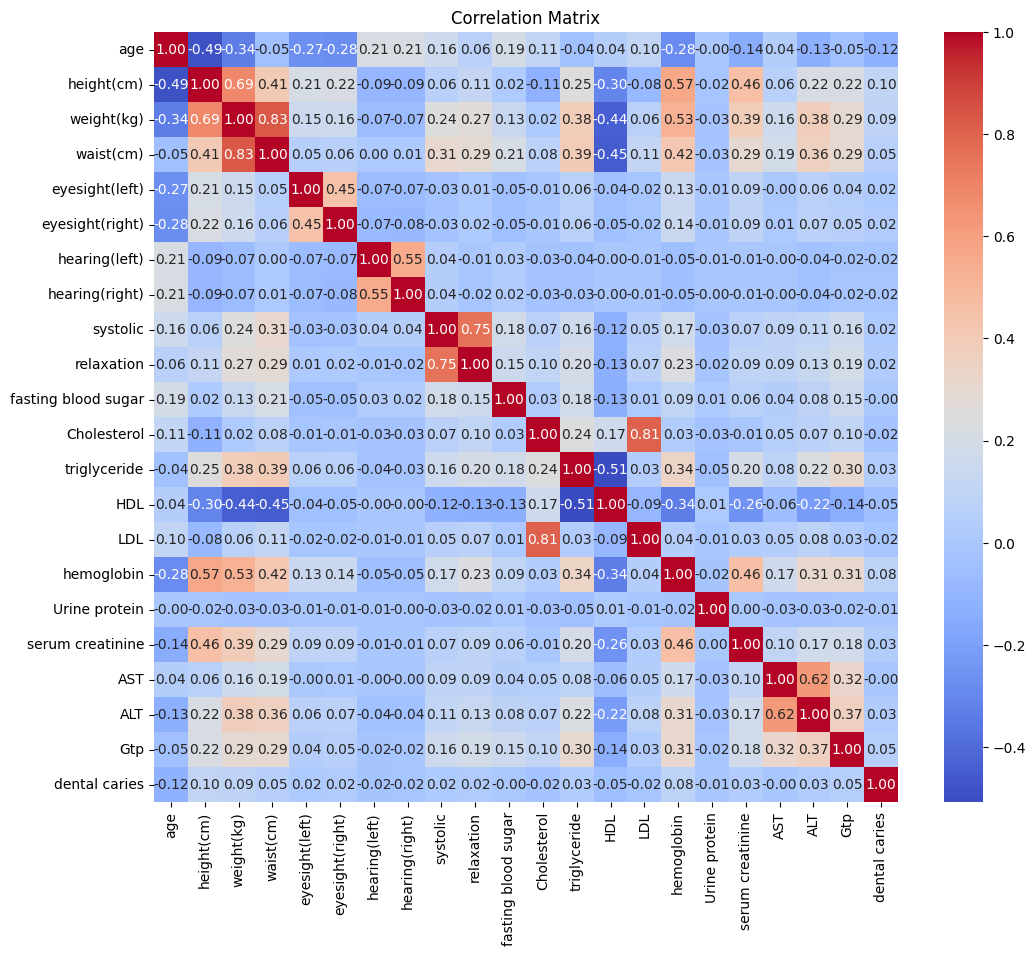

In [ ]:
numeric_cols = train_df.select_dtypes(include=[float, int]).columns
numeric_cols = numeric_cols.drop(["id", "smoking"], errors='ignore')

df_numeric = train_df[numeric_cols]

corr_matrix = df_numeric.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


1. Handling missing values (not needed)

2. Outlier detection and handling

In [ ]:
numeric_cols = train_df.drop(columns=[target_col], errors='ignore').select_dtypes(include=[np.number]).columns


for col in numeric_cols:
    Q1 = train_df[col].quantile(0.25)
    Q3 = train_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    train_df[col] = np.where(train_df[col] < lower_bound, lower_bound, train_df[col])
    train_df[col] = np.where(train_df[col] > upper_bound, upper_bound, train_df[col])
    
    test_df[col] = np.where(test_df[col] < lower_bound, lower_bound, test_df[col])
    test_df[col] = np.where(test_df[col] > upper_bound, upper_bound, test_df[col])


3. Feature engineering

In [ ]:
train_df['BMI'] = train_df['weight(kg)'] / ((train_df['height(cm)']/100) ** 2)
test_df['BMI'] = test_df['weight(kg)'] / ((test_df['height(cm)']/100) ** 2)

train_df['Waist_to_Height'] = train_df['waist(cm)'] / train_df['height(cm)']
test_df['Waist_to_Height'] = test_df['waist(cm)'] / test_df['height(cm)']

train_df['Cholesterol_to_HDL'] = train_df['Cholesterol'] / (train_df['HDL'] + 1e-3)
test_df['Cholesterol_to_HDL'] = test_df['Cholesterol'] / (test_df['HDL'] + 1e-3)

train_df['AST_ALT_ratio'] = train_df['AST'] / (train_df['ALT'] + 1e-3)
test_df['AST_ALT_ratio'] = test_df['AST'] / (test_df['ALT'] + 1e-3)


4. Scaling and normalization

In [ ]:
from sklearn.preprocessing import StandardScaler

numeric_cols = train_df.select_dtypes(include=[np.number]).columns
numeric_cols = numeric_cols.drop('smoking', errors='ignore')

scaler = StandardScaler()
train_df[numeric_cols] = scaler.fit_transform(train_df[numeric_cols])
test_df[numeric_cols] = scaler.transform(test_df[numeric_cols])


5. Logarithmic transformations for skewed features

In [ ]:
# print(train_df['Gtp'].isnull().sum())
# print(test_df['Gtp'].isnull().sum())
# print((train_df['Gtp'] < 0).sum())
# print((test_df['Gtp'] < 0).sum())

# train_df['Gtp_log'] = np.log1p(train_df['Gtp'])
# test_df['Gtp_log'] = np.log1p(test_df['Gtp'])

# train_df.drop('Gtp', axis=1, inplace=True)
# test_df.drop('Gtp', axis=1, inplace=True)


0
0
97866
65141


C:\Users\darbi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\darbi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


6. Handling categorical features

In [ ]:
cat_cols = ['Urine protein']

train_df = pd.get_dummies(train_df, columns=cat_cols)
test_df = pd.get_dummies(test_df, columns=cat_cols)

train_df, test_df = train_df.align(test_df, join='left', axis=1)
test_df = test_df.fillna(0)


7. Addressing class imbalance

In [ ]:
print(train_df.info())

print(train_df['smoking'].value_counts())

from imblearn.over_sampling import SMOTE

X = train_df.drop('smoking', axis=1)
y = train_df['smoking']

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

train_df_resampled = pd.concat([pd.DataFrame(X_res, columns=X.columns), pd.DataFrame(y_res, columns=['smoking'])], axis=1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  float64
 1   age                  159256 non-null  float64
 2   height(cm)           159256 non-null  float64
 3   weight(kg)           159256 non-null  float64
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  float64
 8   hearing(right)       159256 non-null  float64
 9   systolic             159256 non-null  float64
 10  relaxation           159256 non-null  float64
 11  fasting blood sugar  159256 non-null  float64
 12  Cholesterol          159256 non-null  float64
 13  triglyceride         159256 non-null  float64
 14  HDL                  159256 non-null  float64
 15  LDL              

8. Feature selection using corellation

In [ ]:
corr_matrix = train_df.corr()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(abs(upper_tri[column]) > 0.95)]

train_df = train_df.drop(columns=to_drop)
test_df = test_df.drop(columns=to_drop, errors='ignore')


9. Using model-based feature importance for selection

In [ ]:
X = train_df.drop('smoking', axis=1)
y = train_df['smoking']

model = CatBoostClassifier(iterations=100, verbose=0)
model.fit(X, y)
importances = model.get_feature_importance(prettified=True)
low_importance_features = importances[importances['Importances'] < 0.001]['Feature Id'].tolist()

train_df = train_df.drop(columns=low_importance_features)
test_df = test_df.drop(columns=low_importance_features, errors='ignore')


10. Dimensionality reduction (PCA)

In [ ]:
from sklearn.decomposition import PCA

X = train_df.drop('smoking', axis=1)
y = train_df['smoking']

pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)
test_X_pca = pca.transform(test_df.drop('smoking', axis=1, errors='ignore'))

train_df_pca = pd.DataFrame(X_pca, columns=[f'pca_{i}' for i in range(10)])
train_df_pca['smoking'] = y

test_df_pca = pd.DataFrame(test_X_pca, columns=[f'pca_{i}' for i in range(10)])


Rerunning

In [ ]:
X = train_df.drop(columns=[target_col])
y = train_df[target_col]

X = X.drop(columns=["id"], errors='ignore')
X_test = test_df.drop(columns=["id"], errors='ignore')

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30, show_progress_bar=True)

print("Best trial:")
best_trial = study.best_trial
print(f"  Value: {best_trial.value}")
print("  Params: ")
for key, value in best_trial.params.items():
    print(f"    {key}: {value}")

best_params = best_trial.params
best_params["eval_metric"] = "Accuracy"
best_params["verbose"] = 0
best_params["task_type"] = "CPU"

final_model = CatBoostClassifier(**best_params)
train_pool = Pool(X, y)
final_model.fit(train_pool)

test_preds = final_model.predict(X_test)

test_preds = test_preds.astype(int)

submission = pd.DataFrame({
    "id": test_ids,
    "smoking": test_preds
})
submission.to_csv("data/submissions.csv", index=False)

print("Submission file created: data/submissions.csv")

[I 2024-12-08 19:46:20,783] A new study created in memory with name: no-name-366b4aa6-80d0-43a6-a5dc-89aa7ae8ef6d
Best trial: 0. Best value: 0.780322:   3%|▎         | 1/30 [00:37<18:07, 37.50s/it]

[I 2024-12-08 19:46:58,291] Trial 0 finished with value: 0.7803222555176377 and parameters: {'iterations': 1320, 'depth': 6, 'learning_rate': 0.06798178803181512, 'l2_leaf_reg': 3.1527323419709337, 'random_strength': 0.01534011320582513, 'border_count': 219}. Best is trial 0 with value: 0.7803222555176377.


Best trial: 0. Best value: 0.780322:   7%|▋         | 2/30 [02:04<31:00, 66.43s/it]

[I 2024-12-08 19:48:24,981] Trial 1 finished with value: 0.7780303635247685 and parameters: {'iterations': 1297, 'depth': 6, 'learning_rate': 0.013198858319607548, 'l2_leaf_reg': 9.254987365417348, 'random_strength': 0.010888940911586606, 'border_count': 121}. Best is trial 0 with value: 0.7803222555176377.


Best trial: 0. Best value: 0.780322:  10%|█         | 3/30 [02:52<26:10, 58.17s/it]

[I 2024-12-08 19:49:13,319] Trial 2 finished with value: 0.779845037986569 and parameters: {'iterations': 601, 'depth': 4, 'learning_rate': 0.0545363320234876, 'l2_leaf_reg': 1.6793804456225752, 'random_strength': 0.006833867598571505, 'border_count': 79}. Best is trial 0 with value: 0.7803222555176377.


Best trial: 3. Best value: 0.780994:  13%|█▎        | 4/30 [03:14<19:03, 44.00s/it]

[I 2024-12-08 19:49:35,586] Trial 3 finished with value: 0.7809941386829063 and parameters: {'iterations': 1476, 'depth': 4, 'learning_rate': 0.25391309589151806, 'l2_leaf_reg': 5.130182699032447, 'random_strength': 0.001150842078066008, 'border_count': 165}. Best is trial 3 with value: 0.7809941386829063.


Best trial: 4. Best value: 0.78171:  17%|█▋        | 5/30 [04:09<19:55, 47.81s/it] 

[I 2024-12-08 19:50:30,148] Trial 4 finished with value: 0.7817099571925606 and parameters: {'iterations': 1474, 'depth': 9, 'learning_rate': 0.08311595080153845, 'l2_leaf_reg': 6.145355535434252, 'random_strength': 0.002421609543589148, 'border_count': 100}. Best is trial 4 with value: 0.7817099571925606.


Best trial: 4. Best value: 0.78171:  20%|██        | 6/30 [05:42<25:15, 63.16s/it]

[I 2024-12-08 19:52:03,125] Trial 5 finished with value: 0.7662505398178958 and parameters: {'iterations': 1598, 'depth': 7, 'learning_rate': 0.0028641319141446383, 'l2_leaf_reg': 4.106618470114482, 'random_strength': 0.012495957062933214, 'border_count': 121}. Best is trial 4 with value: 0.7817099571925606.


Best trial: 4. Best value: 0.78171:  23%|██▎       | 7/30 [07:14<27:52, 72.73s/it]

[I 2024-12-08 19:53:35,535] Trial 6 finished with value: 0.7627405113930885 and parameters: {'iterations': 1854, 'depth': 3, 'learning_rate': 0.004194072075697287, 'l2_leaf_reg': 2.9691013985878856, 'random_strength': 0.013657860067624978, 'border_count': 99}. Best is trial 4 with value: 0.7817099571925606.


Best trial: 4. Best value: 0.78171:  27%|██▋       | 8/30 [07:29<19:52, 54.21s/it]

[I 2024-12-08 19:53:50,114] Trial 7 finished with value: 0.7531144995338142 and parameters: {'iterations': 1577, 'depth': 6, 'learning_rate': 0.0023437641483176124, 'l2_leaf_reg': 9.51588970379182, 'random_strength': 0.021151046692259028, 'border_count': 154}. Best is trial 4 with value: 0.7817099571925606.


Best trial: 4. Best value: 0.78171:  30%|███       | 9/30 [07:52<15:36, 44.60s/it]

[I 2024-12-08 19:54:13,570] Trial 8 finished with value: 0.7479718233737254 and parameters: {'iterations': 924, 'depth': 4, 'learning_rate': 0.0011855734396563383, 'l2_leaf_reg': 9.732570610053845, 'random_strength': 0.0011069421283109737, 'border_count': 194}. Best is trial 4 with value: 0.7817099571925606.


Best trial: 4. Best value: 0.78171:  33%|███▎      | 10/30 [08:17<12:50, 38.52s/it]

[I 2024-12-08 19:54:38,470] Trial 9 finished with value: 0.7803599380408068 and parameters: {'iterations': 1162, 'depth': 5, 'learning_rate': 0.26005945629478294, 'l2_leaf_reg': 3.962883699656926, 'random_strength': 3.2224725882780825, 'border_count': 56}. Best is trial 4 with value: 0.7817099571925606.


Best trial: 4. Best value: 0.78171:  37%|███▋      | 11/30 [09:29<15:27, 48.84s/it]

[I 2024-12-08 19:55:50,705] Trial 10 finished with value: 0.7802908599205487 and parameters: {'iterations': 268, 'depth': 10, 'learning_rate': 0.043787074726891036, 'l2_leaf_reg': 7.5001176181307505, 'random_strength': 0.42144756398496547, 'border_count': 32}. Best is trial 4 with value: 0.7817099571925606.


Best trial: 4. Best value: 0.78171:  40%|████      | 12/30 [09:57<12:42, 42.38s/it]

[I 2024-12-08 19:56:18,309] Trial 11 finished with value: 0.7793489774196745 and parameters: {'iterations': 1829, 'depth': 9, 'learning_rate': 0.23117780373146218, 'l2_leaf_reg': 6.140921831220867, 'random_strength': 0.0011559352570300065, 'border_count': 169}. Best is trial 4 with value: 0.7817099571925606.


Best trial: 12. Best value: 0.781735:  43%|████▎     | 13/30 [10:39<11:57, 42.19s/it]

[I 2024-12-08 19:57:00,063] Trial 12 finished with value: 0.7817350772975699 and parameters: {'iterations': 859, 'depth': 8, 'learning_rate': 0.13288065947681618, 'l2_leaf_reg': 6.060364735020209, 'random_strength': 0.14108900942105887, 'border_count': 230}. Best is trial 12 with value: 0.7817350772975699.


Best trial: 12. Best value: 0.781735:  47%|████▋     | 14/30 [11:25<11:33, 43.37s/it]

[I 2024-12-08 19:57:46,177] Trial 13 finished with value: 0.7817099526583879 and parameters: {'iterations': 875, 'depth': 8, 'learning_rate': 0.08994128673116747, 'l2_leaf_reg': 7.032073459705051, 'random_strength': 0.2173960021114253, 'border_count': 242}. Best is trial 12 with value: 0.7817350772975699.


Best trial: 12. Best value: 0.781735:  50%|█████     | 15/30 [13:02<14:52, 59.48s/it]

[I 2024-12-08 19:59:22,971] Trial 14 finished with value: 0.7792861905625313 and parameters: {'iterations': 744, 'depth': 8, 'learning_rate': 0.020087394124219237, 'l2_leaf_reg': 7.7310674148623075, 'random_strength': 1.0848029221897502, 'border_count': 243}. Best is trial 12 with value: 0.7817350772975699.


Best trial: 12. Best value: 0.781735:  53%|█████▎    | 16/30 [14:05<14:10, 60.74s/it]

[I 2024-12-08 20:00:26,655] Trial 15 finished with value: 0.7803599372522549 and parameters: {'iterations': 488, 'depth': 10, 'learning_rate': 0.13730506262703127, 'l2_leaf_reg': 5.913895177746503, 'random_strength': 0.07704654278488521, 'border_count': 200}. Best is trial 12 with value: 0.7817350772975699.


Best trial: 12. Best value: 0.781735:  57%|█████▋    | 17/30 [15:40<15:23, 71.06s/it]

[I 2024-12-08 20:02:01,710] Trial 16 finished with value: 0.7800459745786761 and parameters: {'iterations': 1093, 'depth': 8, 'learning_rate': 0.018417060887183027, 'l2_leaf_reg': 4.953153417091041, 'random_strength': 0.0779936134903195, 'border_count': 125}. Best is trial 12 with value: 0.7817350772975699.


Best trial: 12. Best value: 0.781735:  60%|██████    | 18/30 [16:37<13:19, 66.63s/it]

[I 2024-12-08 20:02:58,043] Trial 17 finished with value: 0.7803159788427303 and parameters: {'iterations': 388, 'depth': 9, 'learning_rate': 0.1152582366392816, 'l2_leaf_reg': 8.091925296297278, 'random_strength': 8.554515954086677, 'border_count': 80}. Best is trial 12 with value: 0.7817350772975699.


Best trial: 12. Best value: 0.781735:  63%|██████▎   | 19/30 [17:07<10:14, 55.86s/it]

[I 2024-12-08 20:03:28,785] Trial 18 finished with value: 0.7771701002714144 and parameters: {'iterations': 135, 'depth': 9, 'learning_rate': 0.033274178390969134, 'l2_leaf_reg': 6.5984438720689305, 'random_strength': 0.0036504471447618165, 'border_count': 185}. Best is trial 12 with value: 0.7817350772975699.


Best trial: 12. Best value: 0.781735:  67%|██████▋   | 20/30 [18:44<11:21, 68.13s/it]

[I 2024-12-08 20:05:05,511] Trial 19 finished with value: 0.7767117273532753 and parameters: {'iterations': 696, 'depth': 7, 'learning_rate': 0.0088488139310376, 'l2_leaf_reg': 8.78001500481296, 'random_strength': 0.05070364422845285, 'border_count': 139}. Best is trial 12 with value: 0.7817350772975699.


Best trial: 12. Best value: 0.781735:  70%|███████   | 21/30 [20:06<10:49, 72.20s/it]

[I 2024-12-08 20:06:27,222] Trial 20 finished with value: 0.7807994702887752 and parameters: {'iterations': 950, 'depth': 10, 'learning_rate': 0.1303142449787419, 'l2_leaf_reg': 5.363676165478632, 'random_strength': 0.386617490727773, 'border_count': 255}. Best is trial 12 with value: 0.7817350772975699.


Best trial: 21. Best value: 0.782024:  73%|███████▎  | 22/30 [21:00<08:54, 66.81s/it]

[I 2024-12-08 20:07:21,465] Trial 21 finished with value: 0.782023931694416 and parameters: {'iterations': 829, 'depth': 8, 'learning_rate': 0.08411743160721182, 'l2_leaf_reg': 7.061158342687351, 'random_strength': 0.2829584554549902, 'border_count': 228}. Best is trial 21 with value: 0.782023931694416.


Best trial: 21. Best value: 0.782024:  77%|███████▋  | 23/30 [22:36<08:48, 75.53s/it]

[I 2024-12-08 20:08:57,334] Trial 22 finished with value: 0.7813771591715354 and parameters: {'iterations': 1253, 'depth': 8, 'learning_rate': 0.03097318286270137, 'l2_leaf_reg': 6.724435346899449, 'random_strength': 0.19406615330463545, 'border_count': 219}. Best is trial 21 with value: 0.782023931694416.


Best trial: 21. Best value: 0.782024:  80%|████████  | 24/30 [23:34<07:01, 70.19s/it]

[I 2024-12-08 20:09:55,063] Trial 23 finished with value: 0.7811573909776028 and parameters: {'iterations': 806, 'depth': 9, 'learning_rate': 0.15235636969641506, 'l2_leaf_reg': 8.268889447538214, 'random_strength': 1.0510607293589527, 'border_count': 219}. Best is trial 21 with value: 0.782023931694416.


Best trial: 21. Best value: 0.782024:  83%|████████▎ | 25/30 [24:31<05:31, 66.27s/it]

[I 2024-12-08 20:10:52,182] Trial 24 finished with value: 0.7811259995204107 and parameters: {'iterations': 1066, 'depth': 7, 'learning_rate': 0.07587053289896334, 'l2_leaf_reg': 6.067596882419851, 'random_strength': 0.03327835440521654, 'border_count': 99}. Best is trial 21 with value: 0.782023931694416.


Best trial: 21. Best value: 0.782024:  87%|████████▋ | 26/30 [25:55<04:45, 71.50s/it]

[I 2024-12-08 20:12:15,869] Trial 25 finished with value: 0.7806299352078951 and parameters: {'iterations': 570, 'depth': 8, 'learning_rate': 0.04083983084904695, 'l2_leaf_reg': 4.61156079033482, 'random_strength': 0.1731148205270127, 'border_count': 234}. Best is trial 21 with value: 0.782023931694416.


Best trial: 21. Best value: 0.782024:  90%|█████████ | 27/30 [26:47<03:17, 65.82s/it]

[I 2024-12-08 20:13:08,440] Trial 26 finished with value: 0.7804478361317517 and parameters: {'iterations': 1436, 'depth': 9, 'learning_rate': 0.188101770653539, 'l2_leaf_reg': 7.222853595392267, 'random_strength': 1.0715263528052927, 'border_count': 207}. Best is trial 21 with value: 0.782023931694416.


Best trial: 27. Best value: 0.782344:  93%|█████████▎| 28/30 [27:53<02:11, 65.95s/it]

[I 2024-12-08 20:14:14,698] Trial 27 finished with value: 0.782344151920522 and parameters: {'iterations': 990, 'depth': 7, 'learning_rate': 0.09844747305236157, 'l2_leaf_reg': 6.418181928067414, 'random_strength': 0.5927824249288983, 'border_count': 173}. Best is trial 27 with value: 0.782344151920522.


Best trial: 27. Best value: 0.782344:  97%|█████████▋| 29/30 [28:26<00:55, 55.97s/it]

[I 2024-12-08 20:14:47,376] Trial 28 finished with value: 0.781609492346421 and parameters: {'iterations': 994, 'depth': 7, 'learning_rate': 0.2957376126417077, 'l2_leaf_reg': 8.510325114669898, 'random_strength': 0.5048556618753488, 'border_count': 190}. Best is trial 27 with value: 0.782344151920522.


Best trial: 27. Best value: 0.782344: 100%|██████████| 30/30 [29:51<00:00, 59.71s/it]


[I 2024-12-08 20:16:11,952] Trial 29 finished with value: 0.7808497132587248 and parameters: {'iterations': 630, 'depth': 5, 'learning_rate': 0.06933491157691586, 'l2_leaf_reg': 2.871442675679081, 'random_strength': 2.5892398381236332, 'border_count': 216}. Best is trial 27 with value: 0.782344151920522.
Best trial:
  Value: 0.782344151920522
  Params: 
    iterations: 990
    depth: 7
    learning_rate: 0.09844747305236157
    l2_leaf_reg: 6.418181928067414
    random_strength: 0.5927824249288983
    border_count: 173
Submission file created: data/submissions.csv
